In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

import os
if Path('.').absolute().parents[1].name == 'ml_drought':
    os.chdir(Path('.').absolute().parents[1])

from scripts.plotting_utils import (
    plot_geog_location, plot_xarray_on_map, 
)

from src.utils import drop_nans_and_flatten

%matplotlib inline

%load_ext autoreload
%autoreload 2


In [2]:
# set data and plot dir
if Path('.').absolute().owner() == 'tommylees':
    data_dir = Path('/Volumes/Lees_Extend/data/ecmwf_sowc/data')
    plot_dir = Path('/Users/tommylees/Downloads')
else:
    data_dir = Path('data')
    plot_dir = Path('.')  # ???

chirps_path = data_dir / "interim" / "chirps_preprocessed" / "chirps_kenya.nc"
analysis_path = data_dir / "analysis" 
all_indices_path = analysis_path / "indices" / "all_indices_kenya.nc"
vhi_path = data_dir / "interim" / "vhi_preprocessed" / "vhi_kenya.nc"
gleam_path = data_dir / "interim" / "gleam_preprocessed" / "gleam_kenya.nc"
era5_path = data_dir / "interim" / "era5POS_preprocessed" / "era5POS_kenya.nc"
esa_cci_lc_path = data_dir / "interim" / "esa_cci_landcover_preprocessed" / "esa_cci_landcover_kenya.nc"

[d.name for d in (data_dir/'interim' ).iterdir()]

['chirps_preprocessed',
 'era5_land_interim',
 'era5_land_preprocessed',
 'era5POS_preprocessed',
 'esa_cci_landcover_preprocessed',
 'gcloud',
 'gleam_preprocessed',
 'reanalysis-era5-land_preprocessed',
 's5_interim',
 's5_preprocessed',
 'TEMP',
 'vhi_interim',
 'vhi_preprocessed']

In [3]:
ds = xr.open_dataset(esa_cci_lc_path)

ds_mask = xr.open_dataset(chirps_path).isel(time=0).isnull().precip.rename('lc_class')

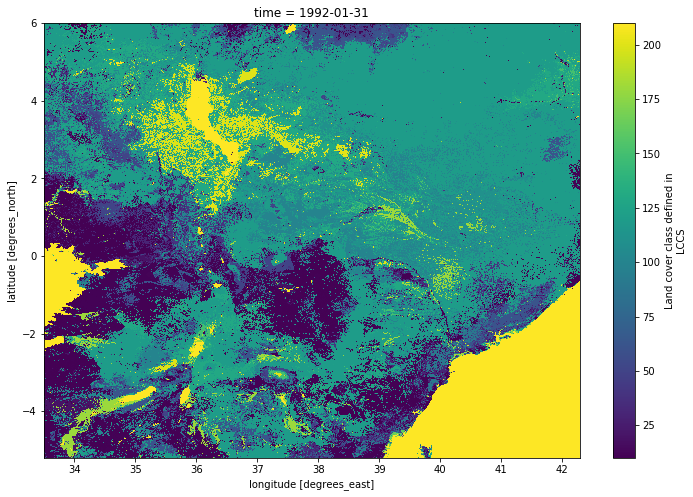

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ds.isel(time=0).lc_class.plot(ax=ax)

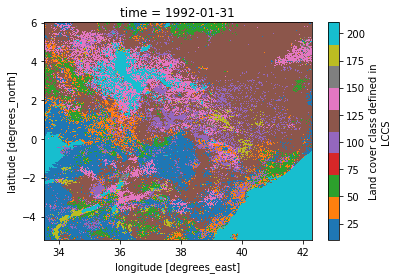

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ds.isel(time=0).lc_class.plot.pcolormesh(cmap='tab10', ax=ax)

In [23]:
lookup = dict(zip(ds.lc_class.attrs['flag_values'], (ds.lc_class.attrs['flag_meanings']).split(' ')))
# lookup[k for i, k in enumerate(lookup.values()) if i < 3]

In [ ]:
# add dict to xarray object
from scripts.eng_utils import get_lookup_val

ds_ = get_lookup_val(ds, 'lc_class', 'lc_label', lookup)
ds_

In [ ]:
list(ds.data_vars())